In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
R = 10 # sphere radius
T = 400 # simulation time
bc_1 = 100 # boundary condition 1
bc_2 = 20 # boundary condition 2

def stability_factor(k, j):
    """
    Checks and return stability factor
    """
    factor = k/(j**2)
    if factor > 0.5:
        print("Factor is too large, try a different grid spacing")
        return
    return factor

def init_grid(j, k):
    """
    Creates spatial and temporal grids
    """
    p = np.arange(0, R+j, j)
    t = np.arange(0, T+k, k)
    return p, t


def explicit_solver(T, j, k):
    """
    Solves the heat equation using explicit method
    """
    # spatial and temporal grids
    p, t = init_grid(j, k)

    # temperature matrix
    n = len(p)
    m = len(t)
    T = np.zeros((n, m+1)) # includes ghost node

    # initial conditions
    T[0, :] = bc_1
    T[:, 0] = bc_2

    # stability factor
    z = stability_factor(k, j)

    for i in range(1, n):
        for j in range(1, m):
            T[i,j] = (1-2*z)*T[i-1,j] + z*(T[i-1,j-1] + T[i-1,j+1])
            T[i,-1] = T[i,-3]

    T = T[:, :-1] # remove ghost node
    return T

 ...]

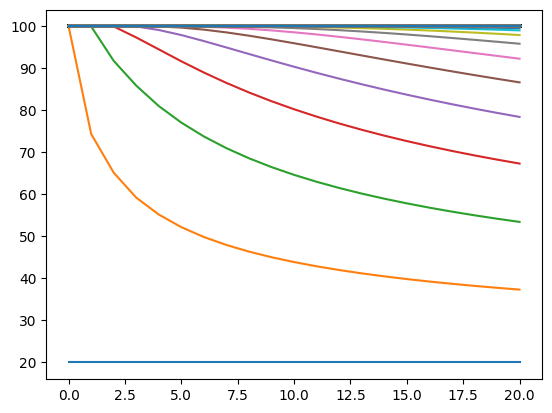

In [29]:
a = explicit_solver(T, 0.5, 0.08)
plt.plot(a)

In [ ]:
# Create meshgrid
pp, tt = np.meshgrid(p, t)

T = T.transpose()

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(tt, pp, T, cmap='viridis')

# Add labels and title
ax.set_xlabel('Time (t)')
ax.set_ylabel('Radius (p)')
ax.set_zlabel('Temperature (T)')
ax.set_title('Temperature Distribution on a Sphere')

# Show the plot
plt.show()